In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\gsarv\SMS Spam Classifier\spam.csv", encoding="latin-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
761,ham,"We are at grandmas. Oh dear, u still ill? I fe...",NaN,NaN,NaN
3969,ham,That's the trouble with classes that go well -...,NaN,NaN,NaN
5146,ham,Oh unintentionally not bad timing. Great. Fing...,NaN,NaN,NaN
3569,spam,Customer Loyalty Offer:The NEW Nokia6650 Mobil...,NaN,NaN,NaN
450,ham,hanks lotsly!,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [7]:
df.sample(5)

,v1,v2
3870,ham,Yeah my usual guy's out of town but there're d...
4029,ham,"Cool, I'll text you in a few"
2854,ham,Your gonna be the death if me. I'm gonna leave...
462,spam,"UpgrdCentre Orange customer, you may now claim..."
2119,ham,I hope you know I'm still mad at you.


In [8]:
df.rename(columns = {'v1': 'Target', 'v2': 'text'},inplace = True)
df.sample(5)

,Target,text
3634,ham,It's not that you make me cry. It's just that ...
4795,spam,URGENT This is our 2nd attempt to contact U. Y...
5033,ham,I want to go to perumbavoor
4422,ham,alright. Thanks for the advice. Enjoy your nig...
1094,ham,Now only i reached home. . . I am very tired n...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['Target'] = encoder.fit_transform(df['Target'])

In [11]:
df.isnull().sum()

Target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(403)

In [13]:
df = df.drop_duplicates(keep = 'first')

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(5169, 2)

## 2. EDA

In [16]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

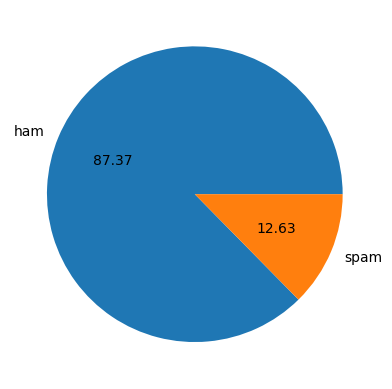

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels = ['ham','spam'], autopct = '%0.2f')
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gsarv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gsarv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
df['num_character'] = df['text'].apply(len)

In [23]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [24]:
df['num_sentence'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,Target,text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.describe()

,Target,num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
# for ham
df[df['Target'] == 0][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# for spam
df[df['Target'] == 1][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns

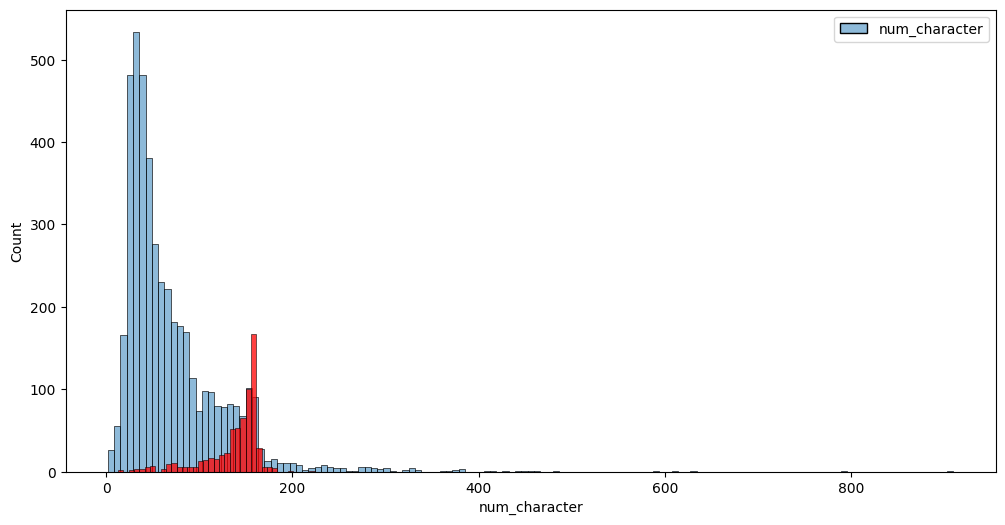

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0][['num_character']])
sns.histplot(df[df['Target'] == 1]['num_character'], color = 'red')
plt.show()

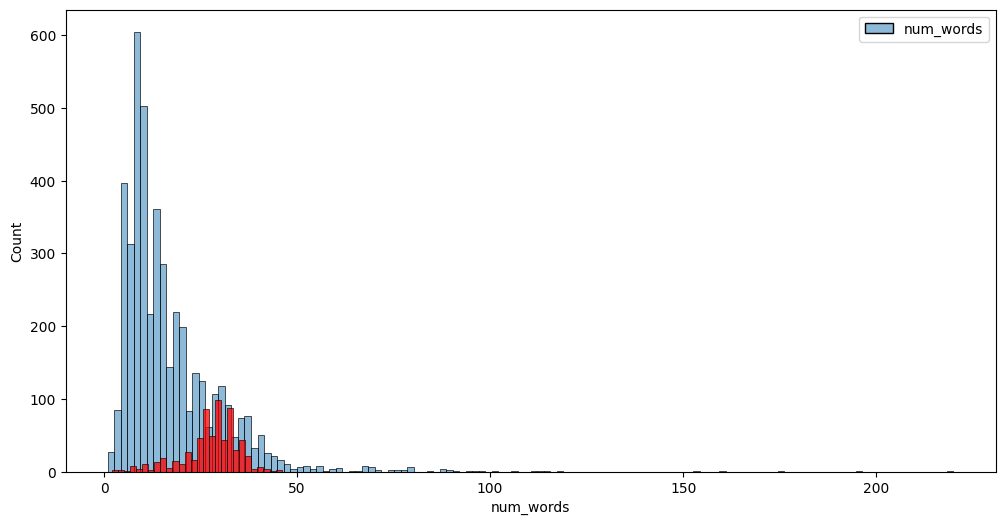

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0][['num_words']])
sns.histplot(df[df['Target'] == 1]['num_words'], color = 'red')
plt.show()

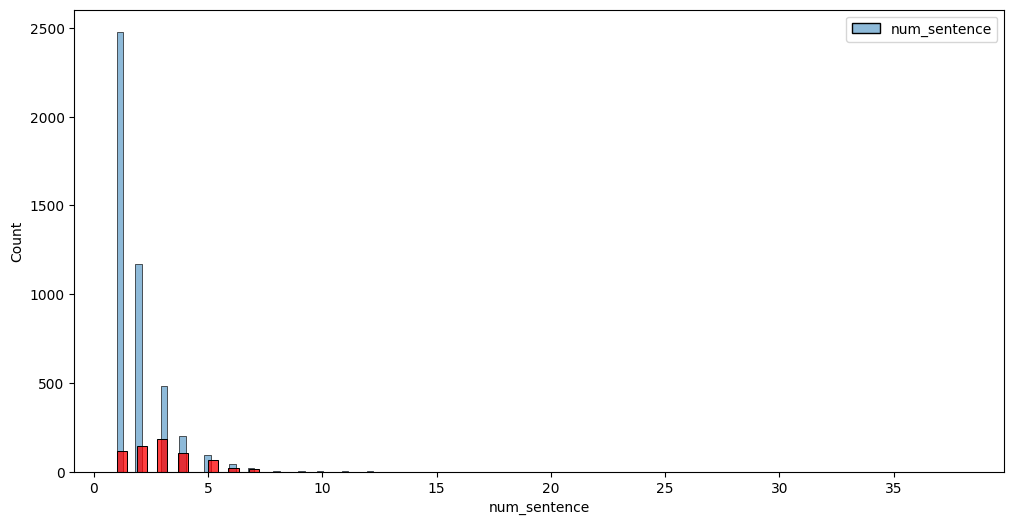

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0][['num_sentence']])
sns.histplot(df[df['Target'] == 1]['num_sentence'], color = 'red')
plt.show()

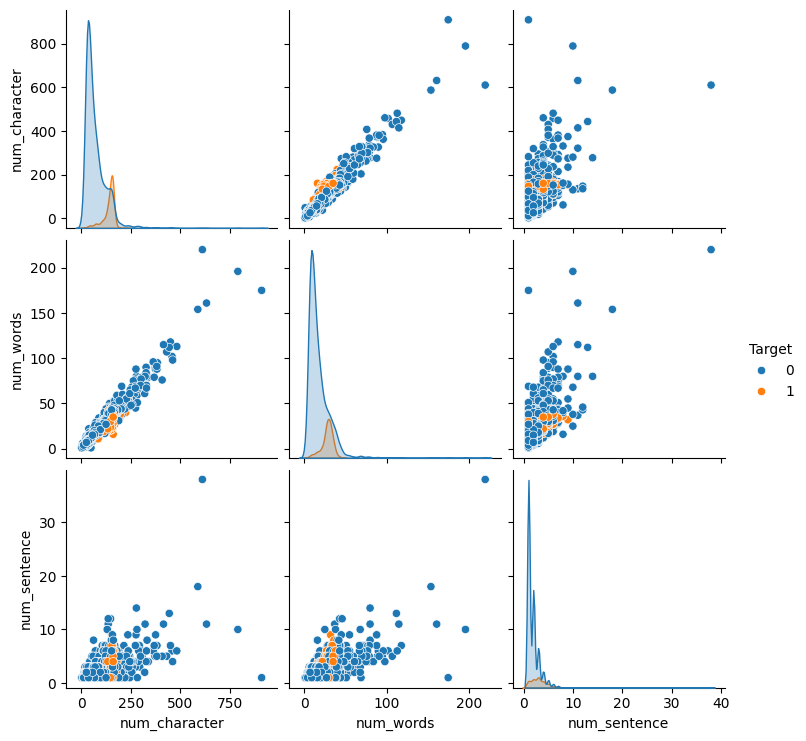

In [33]:
sns.pairplot(df, hue = 'Target')

<Axes: >

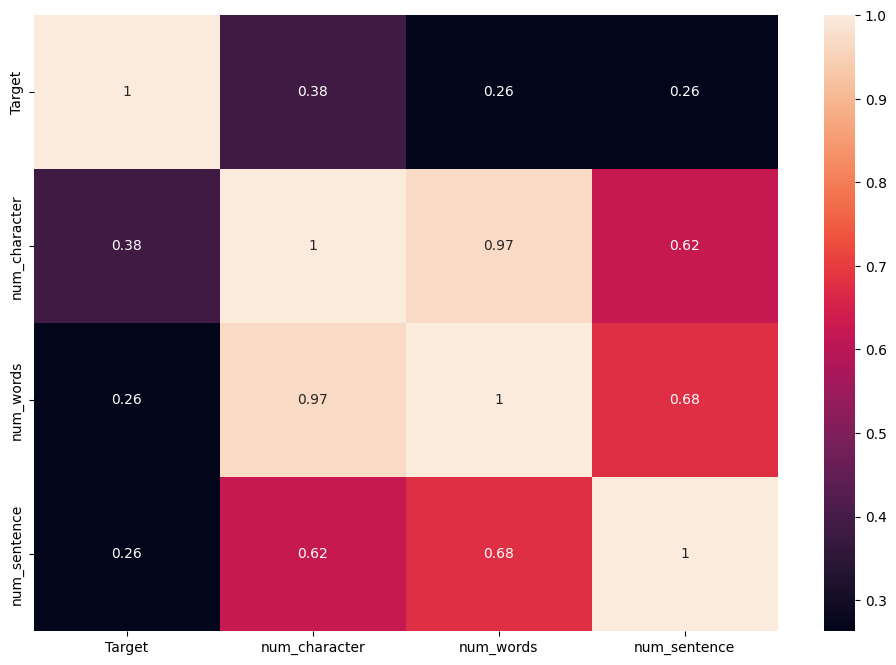

In [34]:
numeric_df = df.select_dtypes(include = ['number'])
plt.figure(figsize= (12,8))
sns.heatmap(numeric_df.corr() ,annot = True)

## 3. Data Preprocessing
. Lower case 
. Tokenization
. Removing special characters
. Removing stop words and punctuation
. Stemming

In [35]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gsarv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [38]:
def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)

    # remove non-alphanumeric
    y = []
    for x in tokens:
        if x.isalnum():
            y.append(x)

    # remove stopwords and punctuation
    filtered = []
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:
            filtered.append(i)

    # stemming
    stemmed = []
    for i in filtered:
        stemmed.append(ps.stem(i))

    return " ".join(stemmed)

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,Target,text,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white') 

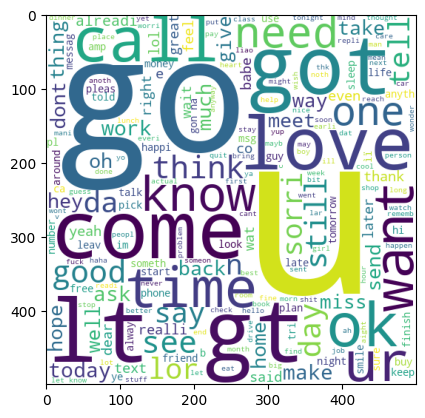

In [42]:
spam_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep = ' '))
plt.imshow(spam_wc)

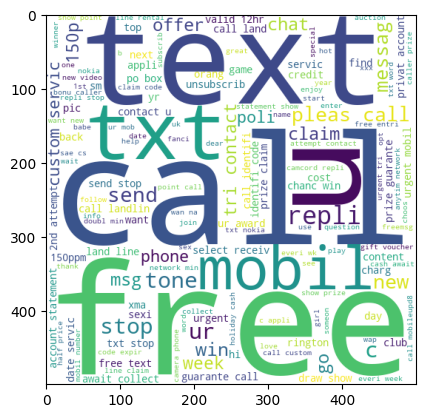

In [43]:
ham_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep = ' '))
plt.imshow(ham_wc)

In [44]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [45]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

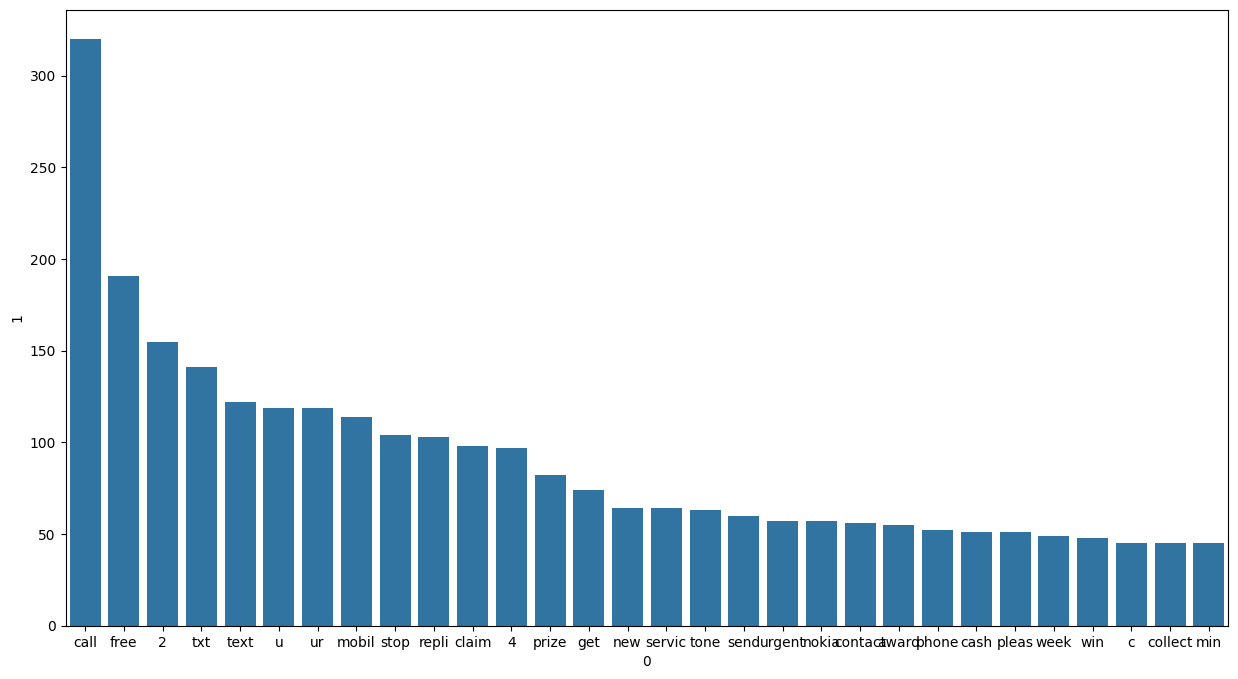

In [46]:
from collections import Counter
plt.figure(figsize= (15,8))
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.show()

In [47]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word) 

In [48]:
len(ham_corpus)

35404

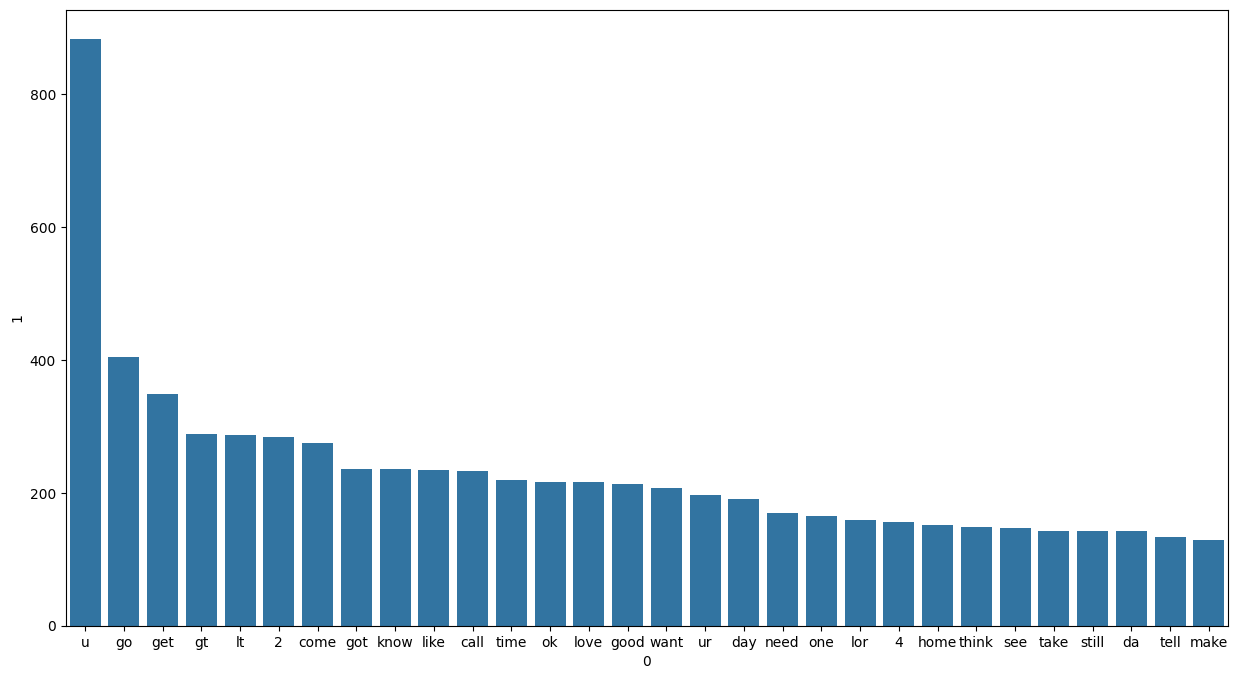

In [49]:
plt.figure(figsize= (15,8))
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.show()

In [50]:
# text vectorization
# using bag of words
df.sample(5)

,Target,text,num_character,num_words,num_sentence,transformed_text
2835,0,Nice.nice.how is it working?,28,5,1,work
704,0,True dear..i sat to pray evening and felt so.s...,75,19,1,true dear sat pray even felt sm time
149,0,Sindu got job in birla soft ..,30,7,1,sindu got job birla soft
3872,0,"Happy or sad , one thing about past is- \Its n...",76,23,1,happi sad one thing past good morn
473,1,Want 2 get laid tonight? Want real Dogging loc...,159,34,5,want 2 get laid tonight want real dog locat se...


## 4. Model Building 

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [52]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [53]:
X.shape

(5169, 3000)

In [54]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test, y_train,y_test = train_test_split(X,y,train_size = 0.2,random_state=42) 

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb.fit(X_train,y_train)
pred1 = gnb.predict(X_test)
print(accuracy_score(pred1,y_test))
print(confusion_matrix(pred1,y_test))
print(precision_score(y_test,pred1))

0.8880560928433269
[[3245  108]
 [ 355  428]]
0.5466155810983397


In [74]:
mnb.fit(X_train,y_train)
pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(precision_score(y_test,pred2))

0.9052224371373307
[[3600    0]
 [ 392  144]]
1.0


In [61]:
bnb.fit(X_train,y_train)
pred3 = bnb.predict(X_test)
print(accuracy_score(pred3,y_test))
print(confusion_matrix(pred3,y_test))
print(precision_score(y_test,pred3))

0.9257736943907157
[[3595  302]
 [   5  234]]
0.9790794979079498


In [62]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [63]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [64]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [65]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [66]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9598646034816247
Precision -  0.9601990049751243
For  KN
Accuracy -  0.879110251450677
Precision -  1.0
For  NB
Accuracy -  0.9052224371373307
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8227513227513228
For  LR
Accuracy -  0.910541586073501
Precision -  0.8807339449541285
For  RF
Accuracy -  0.9395551257253385
Precision -  0.9965277777777778
For  AdaBoost
Accuracy -  0.9206963249516441
Precision -  0.8636363636363636
For  BgC
Accuracy -  0.9436653771760155
Precision -  0.8650602409638555
For  ETC
Accuracy -  0.9458413926499033
Precision -  0.9968152866242038
For  GBDT
Accuracy -  0.9366537717601547
Precision -  0.9659863945578231
For  xgb
Accuracy -  0.9434235976789168
Precision -  0.8629807692307693


In [72]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.879110,1.000000
2,NB,0.905222,1.000000
8,ETC,0.945841,0.996815
5,RF,0.939555,0.996528
9,GBDT,0.936654,0.965986
0,SVC,0.959865,0.960199
4,LR,0.910542,0.880734
7,BgC,0.943665,0.865060
6,AdaBoost,0.920696,0.863636
10,xgb,0.943424,0.862981


In [75]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))